# (Borrower characteristics that affects Borrower APR)
## by (Ali Nasser Mohamed)

## Investigation Overview

> In this investigation, I wanted to look at Borrower characteristics that affects Borrower APR
and which People take loans from prosper 

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [10]:
# load in the dataset into a pandas dataframe
df=pd.read_csv("prosperLoanData.csv", encoding= 'unicode_escape')
columns_of_interest=["Term","LoanStatus","BorrowerAPR","BorrowerRate","ListingCategory (numeric)","LoanOriginalAmount","CurrentlyInGroup","ProsperRating (numeric)","EmploymentStatus","IsBorrowerHomeowner","StatedMonthlyIncome","TotalProsperLoans"]
print(len(columns_of_interest))
spec_df=df[columns_of_interest]
spec_df.head()

12


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),LoanOriginalAmount,CurrentlyInGroup,ProsperRating (numeric),EmploymentStatus,IsBorrowerHomeowner,StatedMonthlyIncome,TotalProsperLoans
0,36,Completed,0.16516,0.1580,0,9425,True,NaN,Self-employed,True,3083.333333,NaN
1,36,Current,0.12016,0.0920,2,10000,False,6.0,Employed,False,6125.000000,NaN
2,36,Completed,0.28269,0.2750,0,3001,True,NaN,Not available,False,2083.333333,NaN
3,36,Current,0.12528,0.0974,16,10000,False,6.0,Employed,True,2875.000000,NaN
4,36,Current,0.24614,0.2085,2,15000,False,3.0,Employed,True,9583.333333,1.0


## (the distibution of our main feature(Borrower APR))

>we see that the range of Borrower APR is between 0.05 and 3.5 

Text(0.5, 1.0, 'distribution pf borrower APR')

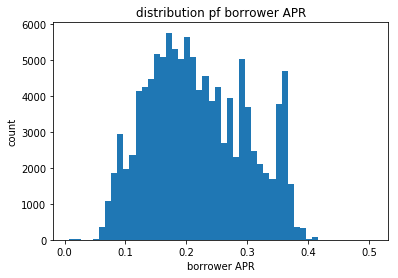

In [3]:
#prepare the bins and plotting

bins=np.arange(np.min(spec_df["BorrowerAPR"]),np.max(spec_df["BorrowerAPR"]),0.01)
plt.hist(data=spec_df,x="BorrowerAPR",bins=bins);
plt.xlabel("borrower APR")
plt.ylabel("count")
plt.title("distribution pf borrower APR")
plt.show()

## (which kind of people go and take aloan from prosper)

>we found that most of people who takes loans is employed ones

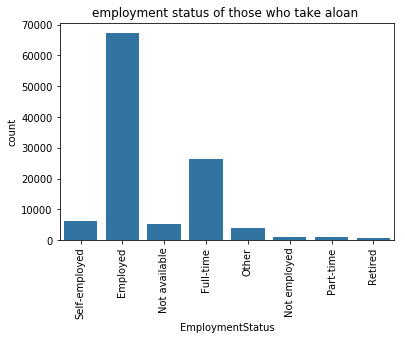

In [11]:
base_color=sb.color_palette()[0]
sb.countplot(data=spec_df,x="EmploymentStatus",color=base_color);
plt.xticks(rotation=90)
plt.title("employment status of those who take aloan ")
plt.show()

## (Borrower APR for high and low terms &How term is related to original loan amount )

 we found that high amount of loan will be taken on a large term as we expect that increasing the term will increase the BorrowerAPR but we found alse that at higher terms the mean of BorrowerAPR decreases which need more investigations
 that we will see later in our presentation 

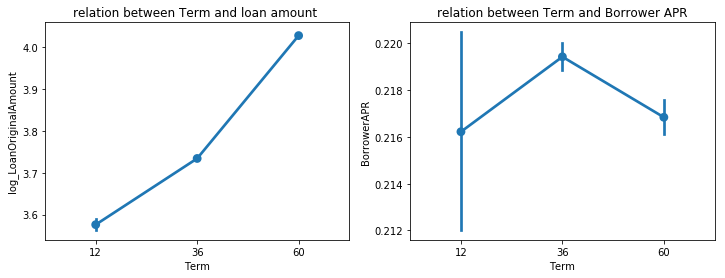

In [14]:
#make alog function to transfer original loan amounts to logaritimic values  
def log_trans(x,inverse=False):
   if not inverse:
        return np.log10(x)
   else:
      return np.power(10, x) 
spec_df["log_LoanOriginalAmount"]=spec_df["LoanOriginalAmount"].apply(log_trans)

spec_df["Term"] = spec_df["Term"].astype(object,replace=True)
fug,ax=plt.subplots(ncols=2,figsize=[12,4])
sb.pointplot(data=spec_df,x="Term",y="log_LoanOriginalAmount",ax=ax[0])
sb.pointplot(data=spec_df,x="Term",y="BorrowerAPR",ax=ax[1])
ax[0].set_title("relation between Term and loan amount ")
ax[1].set_title("relation between Term and Borrower APR")
plt.show()


## ( the effect of Employment Status and Is Borrower Homeowner on BorrowerAPR)

 being employed and have gome make the APR becomes lower
that may be the prosrer consier the employed ones more consident and give them high prosper rate 

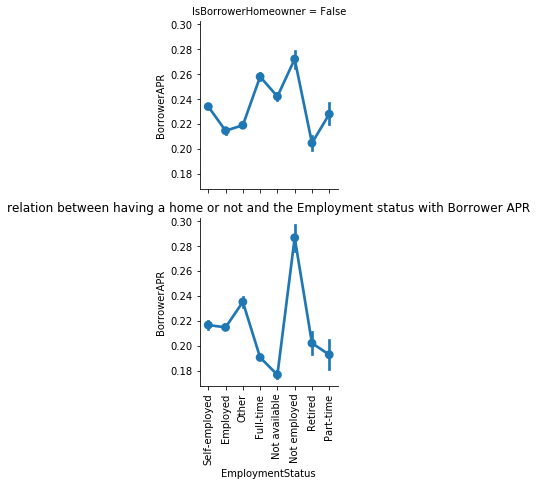

In [13]:

g = sb.FacetGrid(data = spec_df, col = 'IsBorrowerHomeowner',col_wrap=1, size = 3)
g.map(sb.pointplot, 'EmploymentStatus', 'BorrowerAPR', color = base_color);
g.set_ylabels('BorrowerAPR')
plt.xticks(rotation=90)
plt.title("relation between having a home or not and the Employment status with Borrower APR")
plt.show()


## the effect of both original amount of loan and Term  on APR

we now could understand why the mean of borrower APR become smaller with increase in term that happens because loans of high terms has a very high original laon amount and with incrasing the original amount the Borrower APR become smaller

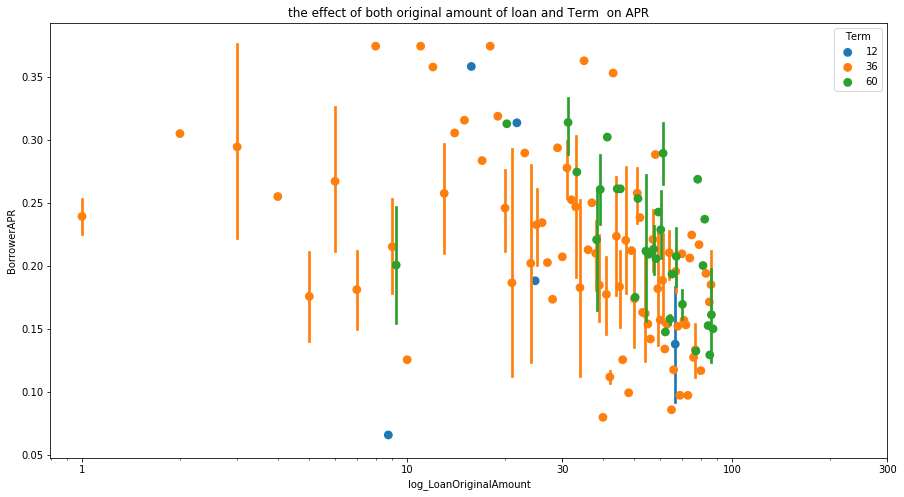

In [16]:

plt.figure(figsize=[15,8]);
loc=np.random.choice(spec_df.shape[0],500,replace=True)
sample=spec_df.loc[loc,:]
sb.pointplot(data=sample,x="log_LoanOriginalAmount",y="BorrowerAPR",hue="Term",linestyles = '',dodge = 0.5);
plt.title('the effect of both original amount of loan and Term  on APR')
plt.xscale("log");
plt.ylabel('BorrowerAPR');
plt.xlabel("log_LoanOriginalAmount");
plt.xticks([1,10,30,100,300], [1,10,30,100,300]);
ordinal_var_dict = {'Term': [12, 36, 60]}
plt.show()
